In [9]:
%matplotlib inline
import pylab
import pandas as pd
import glob
from collections import defaultdict

In [10]:
sample_id='SRR5950647'
outdir = 'outputs.test.HSMA33MX'


In [11]:
from IPython.display import Markdown as md
from IPython.display import display
md(f"# genome-grist gathergram for metagenome `{sample_id}`")

# genome-grist gathergram for metagenome `SRR5950647`

## load gather CSV

In [15]:
# load gather CSV
gather_df = pd.read_csv(f'../../{outdir}/genbank/{sample_id}.x.genbank.gather.csv')

# names!
print(f'reading from ../../{outdir}/genbank/{sample_id}.genomes.info.csv')
names_df = pd.read_csv(f'../../{outdir}/genbank/{sample_id}.genomes.info.csv')

# connect gather_df to all_df and left_df using 'genome_id'
def fix_name(x):
    return "_".join(x.split('_')[:2]).split('.')[0]

gather_df['genome_id'] = gather_df['name'].apply(fix_name)
names_df['genome_id'] = names_df['acc'].apply(fix_name)

reading from ../../outputs.test.HSMA33MX/genbank/SRR5950647.genomes.info.csv


In [13]:
# CTB bug FIXME - should this ever happen??
# this ensures that only rows that share genome_id are in all the dataframes
in_gather = set(gather_df.genome_id)
names_df = names_df[names_df.genome_id.isin(in_gather)]

# reassign index now that we've maybe dropped rows
gather_df.index = range(len(gather_df))
names_df.index = range(len(names_df))

assert len(names_df) == len(gather_df), (names_df, gather_df)

AssertionError: (Empty DataFrame
Columns: [acc, genome_url, assembly_report_url, ncbi_tax_name, genome_id]
Index: [],    intersect_bp  f_orig_query   f_match  f_unique_to_query  f_unique_weighted  \
0        451000      0.558168  0.087302           0.558168           0.558168   
1        357000      0.441832  0.095994           0.441832           0.441832   

   average_abund  median_abund  std_abund  \
0            1.0           1.0        0.0   
1            1.0           1.0        0.0   

                                                name  \
0  GCA_001881345.1 Escherichia coli strain=SF-596...   
1  GCA_009494275.1 Prevotella copri strain=iAK121...   

                                            filename  \
0  outputs.test.HSMA33MX/genbank/SRR5950647.x.gen...   
1  outputs.test.HSMA33MX/genbank/SRR5950647.x.gen...   

                                md5  f_match_orig  unique_intersect_bp  \
0  683df1ec13872b4b98d59e98b355b52c      0.087302               451000   
1  06cd82b5d11fdd59816052cc8bea4883      0.095994               357000   

   gather_result_rank  remaining_bp  query_filename  query_name query_md5  \
0                   0        357000             NaN         NaN  46f15e8f   
1                   1             0             NaN         NaN  46f15e8f   

   query_bp      genome_id  
0    808000  GCA_001881345  
1    808000  GCA_009494275  )

In [6]:
# re-sort names_df to match gather_df order, using matching genome_id column
names_df.set_index("genome_id")
names_df.reindex(index=gather_df["genome_id"])
_ = names_df.reset_index()

Text(0, 0.5, 'f_unique_to_query, as %')

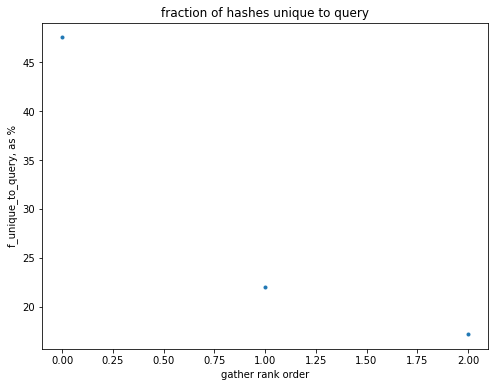

In [7]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(gather_df.index, gather_df["f_unique_to_query"]*100, '.')

pylab.title('fraction of hashes unique to query')
pylab.xlabel('gather rank order')
pylab.ylabel('f_unique_to_query, as %')

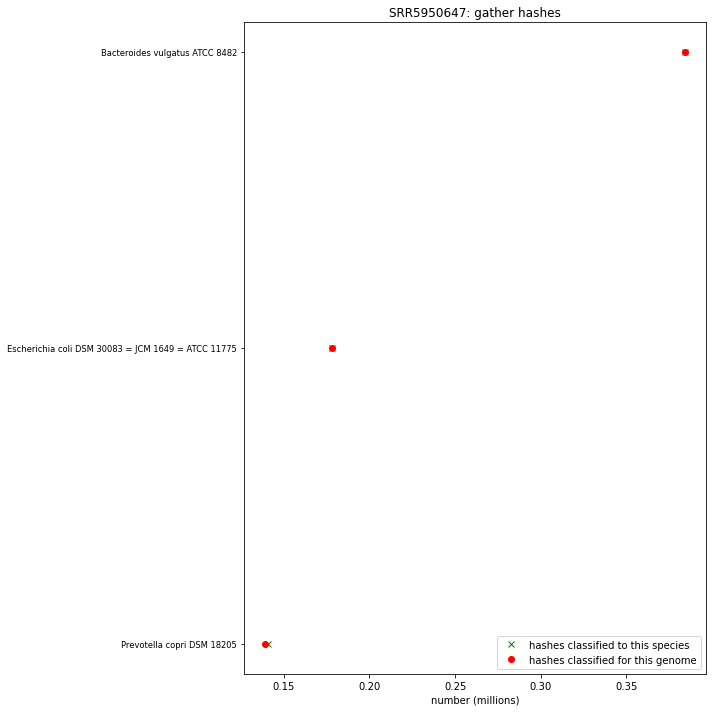

In [8]:
pylab.figure(num=None, figsize=(10, 10))

pylab.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'gx', label='hashes classified to this species')
pylab.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='hashes classified for this genome')

positions = list(gather_df.index)
labels = list(reversed(names_df.ncbi_tax_name))
pylab.yticks(positions, labels, fontsize='small')

pylab.xlabel('number (millions)')
pylab.legend(loc='lower right')
pylab.title(f'{sample_id}: gather hashes')
pylab.tight_layout()
